# Employee Future Prediction

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

c:\users\tushar\appdata\local\programs\python\python38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Reading Dataset

In [2]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### Analysing & Preprocessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
def get_dist_with_leaveornot(data):
    dist = pd.crosstab(data, df['LeaveOrNot'])
    dist['percent_leaving'] = (dist[1] / (dist[0] + dist[1])) * 100
    
    return dist

### Education

<AxesSubplot:xlabel='Education', ylabel='count'>

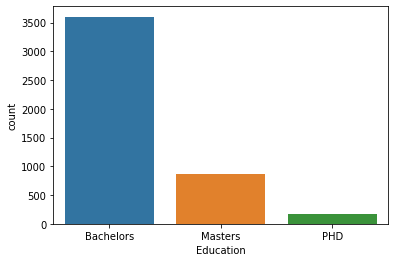

In [5]:
sns.countplot(df['Education'])

In [6]:
get_dist_with_leaveornot(df['Education'])

LeaveOrNot,0,1,percent_leaving
Education,,,
Bachelors,2472,1129,31.352402
Masters,447,426,48.797251
PHD,134,45,25.139665


In [7]:
df['Education'].value_counts().to_dict()

{'Bachelors': 3601, 'Masters': 873, 'PHD': 179}

In [8]:
df['Education'].replace({'Bachelors': 0, 'Masters': 1, 'PHD': 2}, inplace = True)

### Joining Year

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

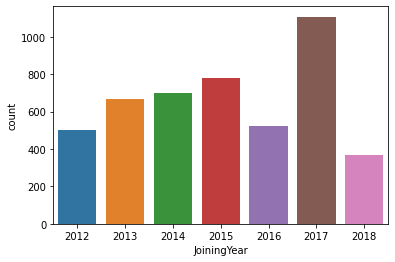

In [9]:
sns.countplot(df['JoiningYear'])

In [10]:
get_dist_with_leaveornot(df['JoiningYear'])

LeaveOrNot,0,1,percent_leaving
JoiningYear,,,
2012,395,109,21.626984
2013,445,224,33.482810
2014,526,173,24.749642
2015,463,318,40.717029
2016,408,117,22.285714
2017,811,297,26.805054
2018,5,362,98.637602


### City

<AxesSubplot:xlabel='City', ylabel='count'>

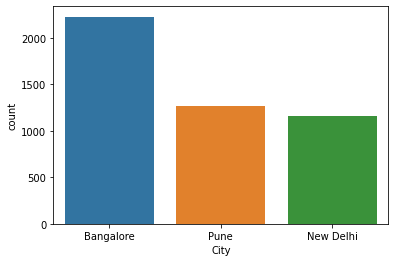

In [11]:
sns.countplot(df['City'])

In [12]:
get_dist_with_leaveornot(df['City'])

LeaveOrNot,0,1,percent_leaving
City,,,
Bangalore,1633,595,26.705566
New Delhi,791,366,31.633535
Pune,629,639,50.394322


In [13]:
df['City'].value_counts().to_dict()

{'Bangalore': 2228, 'Pune': 1268, 'New Delhi': 1157}

In [14]:
df['City'].replace({'Bangalore': 0, 'Pune': 1, 'New Delhi': 2}, inplace = True)

### PaymentTier

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

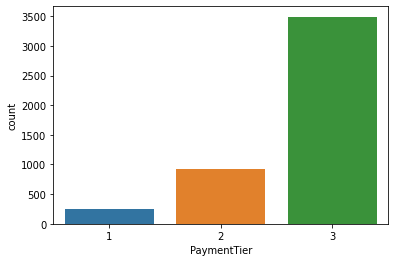

In [15]:
sns.countplot(df['PaymentTier'])

In [16]:
get_dist_with_leaveornot(df['PaymentTier'])

LeaveOrNot,0,1,percent_leaving
PaymentTier,,,
1,154,89,36.625514
2,368,550,59.912854
3,2531,961,27.520046


### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

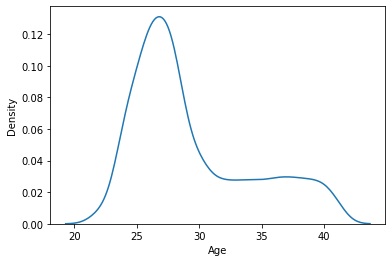

In [17]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age'>

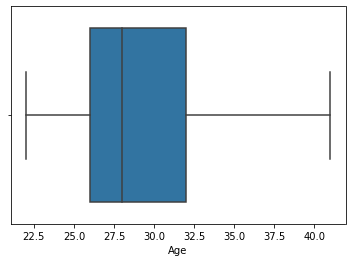

In [18]:
sns.boxplot(df['Age'])

In [19]:
df['Age'].describe()

count    4653.000000
mean       29.393295
std         4.826087
min        22.000000
25%        26.000000
50%        28.000000
75%        32.000000
max        41.000000
Name: Age, dtype: float64

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

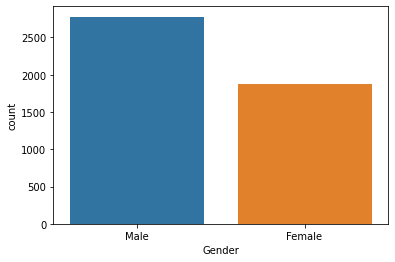

In [20]:
sns.countplot(df['Gender'])

In [21]:
get_dist_with_leaveornot(df['Gender'])

LeaveOrNot,0,1,percent_leaving
Gender,,,
Female,991,884,47.146667
Male,2062,716,25.773938


In [22]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

### EverBenched

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

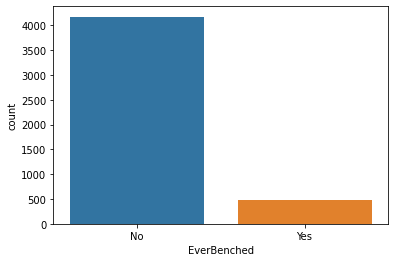

In [23]:
sns.countplot(df['EverBenched'])

In [24]:
get_dist_with_leaveornot(df['EverBenched'])

LeaveOrNot,0,1,percent_leaving
EverBenched,,,
No,2792,1383,33.125749
Yes,261,217,45.397490


In [25]:
df['EverBenched'].replace({'No': 0, 'Yes': 1}, inplace = True)

### Experience In Current Domain

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

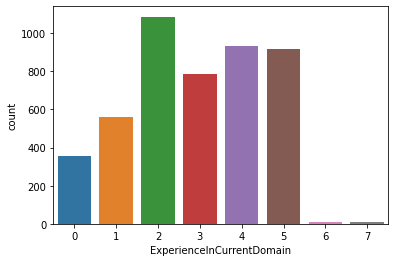

In [26]:
sns.countplot(df['ExperienceInCurrentDomain'])

In [27]:
get_dist_with_leaveornot(df['ExperienceInCurrentDomain'])

LeaveOrNot,0,1,percent_leaving
ExperienceInCurrentDomain,,,
0,231,124,34.929577
1,370,188,33.691756
2,688,399,36.706532
3,487,299,38.040712
4,634,297,31.901182
5,631,288,31.338411
6,6,2,25.000000
7,6,3,33.333333


### Leave Or Not

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

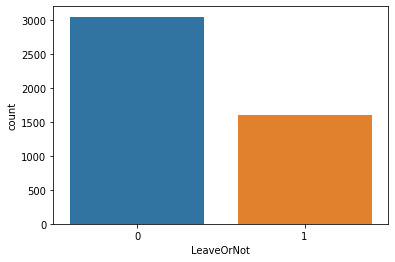

In [28]:
sns.countplot(df['LeaveOrNot'])

In [29]:
sample_leave_df = df[df['LeaveOrNot'] == 1].sample(1500)

# Splitting data into training and testing dataset

In [30]:
x = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [31]:
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [32]:
x = x.append(sample_leave_df.drop('LeaveOrNot', axis = 1))

In [33]:
y = y.append(sample_leave_df['LeaveOrNot'])

In [34]:
y.value_counts()

1    4553
0    3053
Name: LeaveOrNot, dtype: int64

In [35]:
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [36]:
y.value_counts()

0    4553
1    4553
Name: LeaveOrNot, dtype: int64

In [37]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [38]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, stratify=y)

# Model training

In [40]:
class Evaluation():
    def __init__(self, model):
        self.model = model
          
    def train(self, x_train, y_train):
        y_train_pred = self.model.predict(x_train)
        print(f"accuracy score of training dataset : {accuracy_score(y_train, y_train_pred)}\n")
        print(classification_report(y_train, y_train_pred))
        cm = confusion_matrix(y_train, y_train_pred)
        ConfusionMatrixDisplay(cm).plot()
        
    def test(self, x_test, y_test):
        y_test_pred = self.model.predict(x_test)
        print(f"accuracy score of testing dataset : {accuracy_score(y_test, y_test_pred)}\n")
        print(classification_report(y_test, y_test_pred))
        cm = confusion_matrix(y_test, y_test_pred)
        ConfusionMatrixDisplay(cm).plot()

## KNN

In [41]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
knn_evaluation = Evaluation(KNN)

### Training data Evaluation of KNN Model

accuracy score of training dataset : 0.8591301801142188

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3415
           1       0.87      0.84      0.86      3414

    accuracy                           0.86      6829
   macro avg       0.86      0.86      0.86      6829
weighted avg       0.86      0.86      0.86      6829



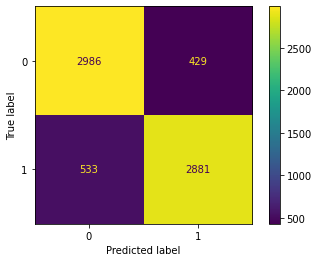

In [43]:
knn_evaluation.train(x_train, y_train)

### Testing data Evaluation of KNN Model

accuracy score of testing dataset : 0.8063241106719368

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1138
           1       0.82      0.79      0.80      1139

    accuracy                           0.81      2277
   macro avg       0.81      0.81      0.81      2277
weighted avg       0.81      0.81      0.81      2277



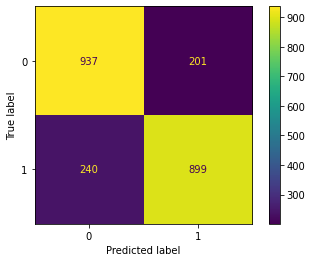

In [44]:
knn_evaluation.test(x_test, y_test)

## Decision Tree

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
dt_evaluation = Evaluation(dt)

### Training data Evaluation of DT Model

accuracy score of training dataset : 0.9155073949333724

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3415
           1       0.95      0.88      0.91      3414

    accuracy                           0.92      6829
   macro avg       0.92      0.92      0.92      6829
weighted avg       0.92      0.92      0.92      6829



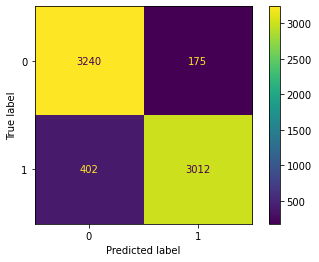

In [47]:
dt_evaluation.train(x_train, y_train)

### Testing data Evaluation of DT Model

accuracy score of testing dataset : 0.841897233201581

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1138
           1       0.86      0.82      0.84      1139

    accuracy                           0.84      2277
   macro avg       0.84      0.84      0.84      2277
weighted avg       0.84      0.84      0.84      2277



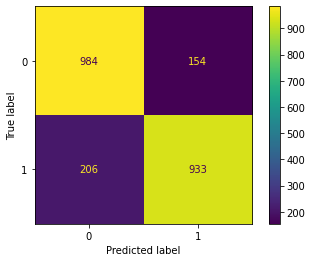

In [48]:
dt_evaluation.test(x_test, y_test)

### Hyperparameter Tuning of DT Model

In [49]:
hyperparameters = {
                   'max_depth' : np.arange(2,10),
                   'min_samples_split' : np.arange(2,20),
                   'min_samples_leaf' : np.arange(1,20) ,
                   'criterion' : ["gini", "entropy"]
                  }

In [50]:
dt = DecisionTreeClassifier()
rscv = RandomizedSearchCV(dt, hyperparameters, cv = 5, n_iter=50)
rscv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [51]:
dt_hypertune = rscv.best_estimator_
dt_hypertune.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)

In [52]:
dt_hypertune_evaluation = Evaluation(dt_hypertune)

accuracy score of training dataset : 0.8417044955337531

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3415
           1       0.92      0.75      0.82      3414

    accuracy                           0.84      6829
   macro avg       0.85      0.84      0.84      6829
weighted avg       0.85      0.84      0.84      6829



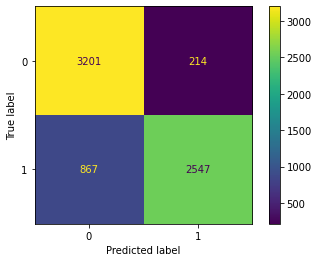

In [53]:
dt_hypertune_evaluation.train(x_train, y_train)

accuracy score of testing dataset : 0.8234519104084321

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1138
           1       0.91      0.72      0.80      1139

    accuracy                           0.82      2277
   macro avg       0.84      0.82      0.82      2277
weighted avg       0.84      0.82      0.82      2277



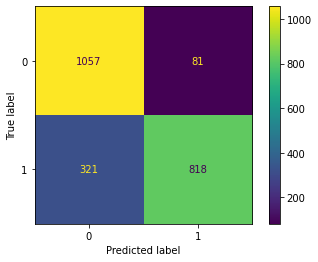

In [54]:
dt_hypertune_evaluation.test(x_test, y_test)

## Random Forest

In [55]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
rf_evaluation = Evaluation(rf)

### Training data evaluation of RF Model

accuracy score of training dataset : 0.9155073949333724

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3415
           1       0.94      0.89      0.91      3414

    accuracy                           0.92      6829
   macro avg       0.92      0.92      0.92      6829
weighted avg       0.92      0.92      0.92      6829



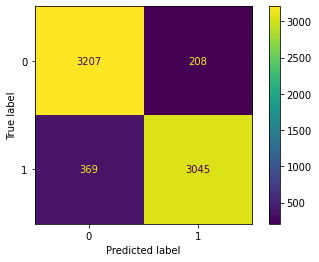

In [57]:
rf_evaluation.train(x_train, y_train)

### Testing data evaluation of RF Model

accuracy score of testing dataset : 0.847167325428195

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1138
           1       0.86      0.83      0.84      1139

    accuracy                           0.85      2277
   macro avg       0.85      0.85      0.85      2277
weighted avg       0.85      0.85      0.85      2277



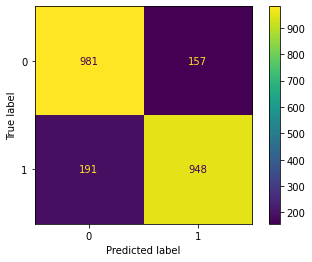

In [58]:
rf_evaluation.test(x_test, y_test)

### Hyperparameter Tuning of Random Forest Model

In [59]:
hyperparameters = {'n_estimators' : np.arange(100,200),
                   'max_depth' : np.arange(2,10),
                   'min_samples_split' : np.arange(2,20),
                   'min_samples_leaf' : np.arange(1,20) ,
                   'criterion' : ["gini", "entropy"]
                  }

In [60]:
rf2 = RandomForestClassifier()
rscv = RandomizedSearchCV(rf2, hyperparameters, cv = 5, n_iter=50)
rscv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([100, 101, 102, 103, 104...
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 

In [61]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=167)

In [62]:
rf_hypertune = rscv.best_estimator_
rf_hypertune.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=167)

In [63]:
rf_hypertune_evaluation = Evaluation(rf_hypertune)

### Evaluation of Hypertuned RF Model

accuracy score of training dataset : 0.8434617074242202

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3415
           1       0.92      0.75      0.83      3414

    accuracy                           0.84      6829
   macro avg       0.86      0.84      0.84      6829
weighted avg       0.86      0.84      0.84      6829



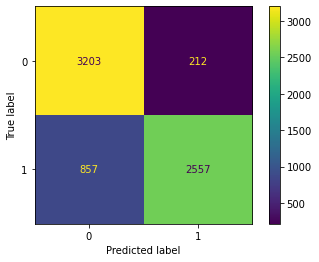

In [64]:
rf_hypertune_evaluation.train(x_train, y_train)

accuracy score of testing dataset : 0.8269653052261748

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1138
           1       0.91      0.72      0.81      1139

    accuracy                           0.83      2277
   macro avg       0.84      0.83      0.83      2277
weighted avg       0.84      0.83      0.83      2277



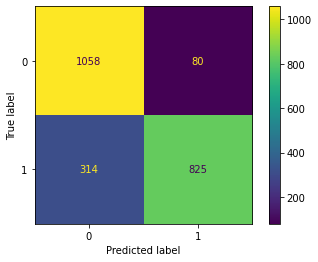

In [65]:
rf_hypertune_evaluation.test(x_test, y_test)

# Gradient Boosting

In [66]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [67]:
gb_evaluation = Evaluation(gb)

### Evaluation of Gradient Boosting Model for train data

accuracy score of training dataset : 0.821935861765998

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      3415
           1       0.89      0.74      0.81      3414

    accuracy                           0.82      6829
   macro avg       0.83      0.82      0.82      6829
weighted avg       0.83      0.82      0.82      6829



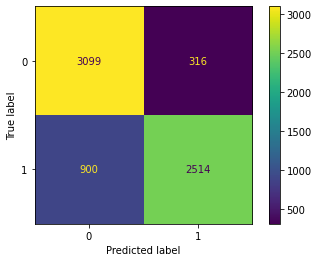

In [68]:
gb_evaluation.train(x_train, y_train)

### Evaluation of Gradient Boosting Model for test data

accuracy score of testing dataset : 0.8014931927975406

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1138
           1       0.88      0.70      0.78      1139

    accuracy                           0.80      2277
   macro avg       0.82      0.80      0.80      2277
weighted avg       0.82      0.80      0.80      2277



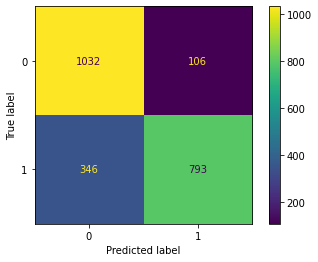

In [69]:
gb_evaluation.test(x_test, y_test)

# XGBoost

In [70]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[19:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xgb_evaluation = Evaluation(xgb)

### Evaluation of XGBoost Model for train data

accuracy score of training dataset : 0.879923854151413

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      3415
           1       0.93      0.83      0.87      3414

    accuracy                           0.88      6829
   macro avg       0.88      0.88      0.88      6829
weighted avg       0.88      0.88      0.88      6829



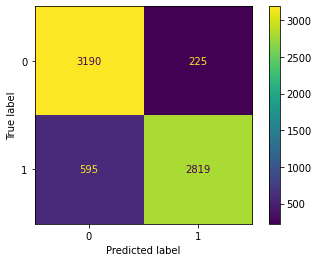

In [72]:
xgb_evaluation.train(x_train, y_train)

### Evaluation of XGBoost Model for test data

accuracy score of testing dataset : 0.836627140974967

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1138
           1       0.88      0.78      0.83      1139

    accuracy                           0.84      2277
   macro avg       0.84      0.84      0.84      2277
weighted avg       0.84      0.84      0.84      2277



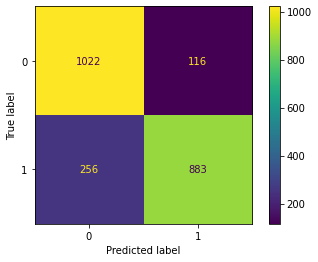

In [73]:
xgb_evaluation.test(x_test, y_test)

## Pickling model file for deployement

In [74]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))